Logistic regression with SVM for detecting breast cancer from Wisconsin data

Mean accuracy: 0.9278095238095239
Standard deviation: 0.017362612633481107
Mean F1 score: 0.9274286010835273
Confusion Matrix: [[122   4]
 [  9  40]]
Cohen's k: 0.8098303101228789
[0.         0.81632653 1.        ]
[0.         0.03174603 1.        ]


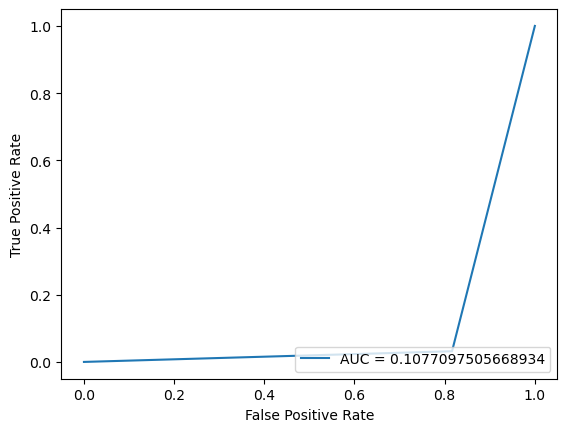

In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

data = pd.read_csv("breast-cancer-wisconsin.csv")

dx = data.iloc[:, 1:-1]
dx = dx.drop(" Bare Nuclei", axis=1)
dy = data.iloc[:, -1]

repeats = 30
accuracies = []
f1 = []

for i in range(0, repeats):
    dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=0.25)
    
    dtm = DecisionTreeClassifier()
    dtm.fit(dx_train, dy_train)

    dy_pred = dtm.predict(dx_test)
    
    accuracies.append(accuracy_score(dy_test, dy_pred))
    f1.append(f1_score(dy_test, dy_pred , average="weighted"))

print("Mean accuracy:", np.mean(accuracies))
print("Standard deviation:", np.std(accuracies))
print("Mean F1 score:", np.mean(f1))
print("Confusion Matrix:", confusion_matrix(dy_test, dy_pred))
print("Cohen's k:", cohen_kappa_score(dy_test, dy_pred))

dy_pred_prob = dtm.predict_proba(dx_test)[:,1]
dy_test = [x == 2 for x in dy_test]

fpr, tpr, _ = metrics.roc_curve(dy_test, dy_pred_prob)
auc = metrics.roc_auc_score(dy_test, dy_pred_prob)

print(fpr)
print(tpr)

plt.plot(fpr, tpr, label = "AUC = " + str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()
